# Pitfalls of Goodnes-of-Fit from Likelihood

**References:**
- https://arxiv.org/abs/physics/0310167

**Abstract:**

> The value of the likelihood is occasionally used by high energy physicists as a statistic to measure goodness-of-fit in unbinned maximum likelihood fits. Simple examples are presented that illustrate why this (seemingly intuitive) method fails in practice to achieve the desired goal. 

## Example: Expotential distribution

\begin{equation}
    f(t)
    =
    \frac{1}{\tau} e^{-\frac{t}{\tau}}
\end{equation}

\begin{equation}
    \mathcal{L}
    =
    \prod_{i}^{n}
    f(t_{i})
    =
    \frac{1}{\tau^{n}}
    \prod_{i}
    e^{\frac{t_{i}}{\tau}}
\end{equation}

\begin{equation}
    \ln \mathcal{L}
    =
    \sum_{i}^{n}
    \ln f(t_{i})
    =
    - n \ln \tau
    -
    \frac{1}{\tau}
    \sum_{i}^{n}
    t_{i}
    =
    - n \ln \tau
    -
    \frac{n}{\tau}
    \bar{t}
\end{equation}

MLE estimator for \tau %\hat{\tau}$

\begin{equation}
    \frac{\partial }{\partial \tau}
    \ln \mathcal{L}
    = 
    - \frac{n}{\tau}
    +
    \frac{n}{\tau^{2}}
    \bar{t}
\end{equation}

\begin{equation}
    \frac{n}{\tau^{2}} \bar{t}
    =
    \frac{n}{\tau}
\end{equation}

\begin{equation}
    \hat{\tau} = \bar{t}
\end{equation}

$\ln \mathcal{L}$ evaluated at $\hat{\tau}$:

\begin{equation}
    \ln \mathcal{L}_{max}
    =
    - n \ln \bar{t}
    - n
    =
    -n (1 + \ln \bar{t})
\end{equation}

**Neyman-Pearson test statistic**

Alternative hypothesis $H_{1}$: $t \sim Uniform$

## Claims of the paper

> The value of the likelihood at its maximum (in this test case) is just a simple function of $\hat{t}$ —all samples with the same mean obtain the same “g.o.f.” value. This is a disaster for g.o.f. Even if the true value of $\tau$ — call it $T$ — were known in advance, so that we could calculate the $p$-value associated with the observed $\hat{t}$, merely comparing the $\hat{t}$ of the data with $T$ is not sufficient to show that the observed data are modeled well by the exponential distribution.

> Since under this method, our P-value ensemble is actually based on the value of $\hat{\tau}$ computed from the data (not knowing the true value $T$ ), we always obtain a $p$-value of about 50%, for any data whatsoever. This is a second disaster for g.o.f. By construction, the distribution of L max from our ensemble of N -event pseudo experiments tracks the $\mathcal{L}_{max}$ observed from the data. The fact that the method yields “reasonable” $p$-values has undoubtedly contributed to its longevity in practice: $p$-values very near 0 or 100% would have triggered further investigation.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_NLL_min(ts):
    t_mean = np.mean(ts)
    n = len(ts)
    NLL_min = n*(1+np.log(t_mean))
    return NLL_min

In [3]:
def calc_NP_lambda(ts, tau=5):
    lam = np.sum(scipy.stats.expon.logpdf(ts, scale=tau))
    return lam

In [4]:
nensemble = 1000
nsamples =  10
tau = 5

In [5]:
t_ensemble_exponential = np.array([scipy.stats.expon.rvs(scale=tau, size=nsamples) for dummy in range(nensemble)])
t_ensemble_uniform     = np.array([scipy.stats.uniform.rvs(scale=tau*2, loc=0.0, size=nsamples) for dummy in range(nensemble)])

In [6]:
NLL_mins_exponential = np.array([calc_NLL_min(ts) for ts in t_ensemble_exponential])
NLL_mins_uniform     = np.array([calc_NLL_min(ts) for ts in t_ensemble_uniform])
NP_lambda_exponential  = np.array([calc_NP_lambda(ts) for ts in t_ensemble_exponential])
NP_lambda_uniform      = np.array([calc_NP_lambda(ts) for ts in t_ensemble_uniform])

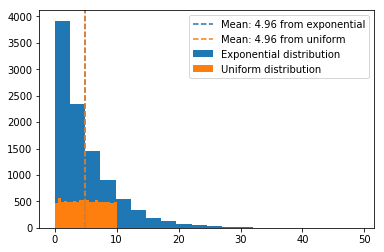

In [7]:
#ts = ts_ensemble[0]
fig, ax = plt.subplots()
ax.hist(t_ensemble_exponential.flatten(), bins=20, color='C0', label='Exponential distribution')
ax.hist(t_ensemble_uniform.flatten(), bins=20, color='C1', label='Uniform distribution')
t_mean_exponential = np.mean(t_ensemble_exponential)
t_mean_uniform = np.mean(t_ensemble_uniform)
ax.axvline(t_mean_exponential, linestyle='--', color='C0', label="Mean: {:.2f} from exponential".format(t_mean_exponential))
ax.axvline(t_mean_uniform, linestyle='--', color='C1', label="Mean: {:.2f} from uniform".format(t_mean_uniform))
ax.legend();

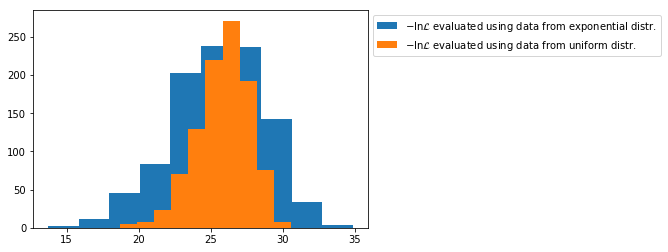

In [8]:
fig, ax = plt.subplots()
ax.hist(NLL_mins_exponential, label=r'$- \ln \mathcal{L}$ evaluated using data from exponential distr.', color='C0')
ax.hist(NLL_mins_uniform, label=r'$- \ln \mathcal{L}$ evaluated using data from uniform distr.', color='C1')
ax.legend(loc='upper left', bbox_to_anchor=(1,1));

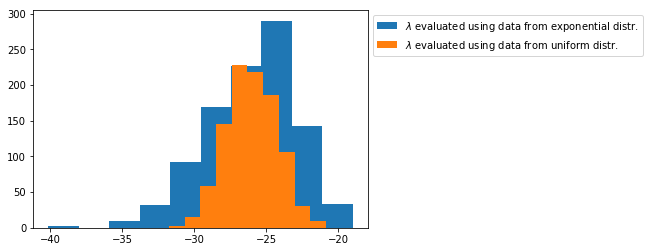

In [9]:
fig, ax = plt.subplots()
ax.hist(NP_lambda_exponential, label=r'$\lambda$ evaluated using data from exponential distr.', color='C0')
ax.hist(NP_lambda_uniform, label=r'$\lambda$ evaluated using data from uniform distr.', color='C1')
ax.legend(loc='upper left', bbox_to_anchor=(1,1));